In [1]:
import pandas as pd
import numpy as np

## Importing files:

In [2]:
lead = pd.read_csv("leads.csv",encoding='latin-1') #Here encoding used to decode the data:

In [3]:
lead.head(2) # Checking the frame

,id,userId,name,phoneNumber,city,state,source,isExternal,createdAt,receivedAt
0,00021a29-83e4-48d3-8cc3-0bc729f087fd,NaN,KUPENDRA,1234567890,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z
1,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,e50fccfe-82aa-434a-ad92-9d3f9d651f84,Dinkle Unknown,1234567890,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,False,2019-12-26T17:49:53.471Z,2019-08-25T00:00:00Z


In [4]:
lead_calls = pd.read_csv("lead_calls.csv")

In [5]:
lead_calls.head(2)

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,00028a99-c401-4048-9b75-b923cff55a79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,NaN,2019-07-25T17:00:00Z,2019-12-26T17:32:49.297Z
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,4248b521-ce3f-4897-a30d-35c9ee81f746,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z


In [6]:
telecallers = pd.read_csv("telecallers.csv")

In [7]:
telecallers.head()

,id,name,phoneNumber,createdAt
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Amila,1234567890,2019-12-25T05:50:26.375Z
1,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba,1234567890,2019-12-25T05:50:26.385Z
2,7717ef5d-38ec-44df-af3b-7a2446071e48,Islam,1234567890,2019-12-25T05:50:26.388Z
3,89b29324-8f3b-4b50-b3f7-0a3e0918e4d2,Rakshith,1234567890,2019-12-25T05:50:26.390Z
4,87112942-9c14-401a-9231-d9b4c2eee0c5,Manasa,1234567890,2019-12-25T05:50:26.393Z


In [8]:
#Working with lead data: let see what it implies:

In [9]:
lead.info() # Checking the information of datatypes of columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9916 entries, 0 to 9915
Data columns (total 10 columns):
id             9916 non-null object
userId         6073 non-null object
name           9916 non-null object
phoneNumber    9916 non-null int64
city           9178 non-null object
state          8536 non-null object
source         9914 non-null object
isExternal     9916 non-null bool
createdAt      9916 non-null object
receivedAt     9916 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 707.0+ KB


In [10]:
lead.isnull().sum()  # Checking null values in column of data set

id                0
userId         3843
name              0
phoneNumber       0
city            738
state          1380
source            2
isExternal        0
createdAt         0
receivedAt        0
dtype: int64

In [11]:
df_isnull = (lead.isnull().sum() / len(lead))*100
missing_data = pd.DataFrame({'Missing Ration' :df_isnull})     #Creating the frame of percentage of null values 
missing_data                                        

,Missing Ration
id,0.000000
userId,38.755547
name,0.000000
phoneNumber,0.000000
city,7.442517
state,13.916902
source,0.020169
isExternal,0.000000
createdAt,0.000000
receivedAt,0.000000


In [12]:
#Working with lead_calls data: let see what it implies:

In [13]:
lead_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 8 columns):
id              12335 non-null object
telecallerId    12335 non-null object
leadId          12335 non-null object
client          11491 non-null object
status          12335 non-null object
comments        3521 non-null object
calledAt        12335 non-null object
createdAt       12335 non-null object
dtypes: object(8)
memory usage: 771.0+ KB


In [14]:
df_isnull1 = (lead_calls.isnull().sum() / len(lead_calls))*100
missing_data2 = pd.DataFrame({'Missing Ration' :df_isnull1})
missing_data2

,Missing Ration
id,0.000000
telecallerId,0.000000
leadId,0.000000
client,6.842319
status,0.000000
comments,71.455209
calledAt,0.000000
createdAt,0.000000


In [15]:
# To check on which column to merge the data sets: lead and lead_calls

In [16]:
ls=[]
for i in lead_calls.leadId:
    ls.append(i)

In [17]:
print(lead['id'].isin(ls).value_counts())

True    9916
Name: id, dtype: int64


In [18]:
ls2=[]
for i in lead_calls.id:
    ls2.append(i)

In [19]:
print(lead['userId'].isin(ls2).value_counts())

False    9916
Name: userId, dtype: int64


In [20]:
data = pd.merge(lead,lead_calls, left_on="id", right_on="leadId")

In [21]:
data.head()

,id_x,userId,name,phoneNumber,city,state,source,isExternal,createdAt_x,receivedAt,id_y,telecallerId,leadId,client,status,comments,calledAt,createdAt_y
0,00021a29-83e4-48d3-8cc3-0bc729f087fd,NaN,KUPENDRA,1234567890,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z,1543f6c9-66ed-44e6-b2a3-fde517de24d0,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,00021a29-83e4-48d3-8cc3-0bc729f087fd,Move in sync,RNR,NaN,2019-12-03T15:00:00Z,2019-12-26T18:17:18.359Z
1,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,e50fccfe-82aa-434a-ad92-9d3f9d651f84,Dinkle Unknown,1234567890,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,False,2019-12-26T17:49:53.471Z,2019-08-25T00:00:00Z,65b4dc11-cb33-467e-b432-d81f082cc1fd,4248b521-ce3f-4897-a30d-35c9ee81f746,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,Zomato,Not Interested - Applied by Mistake,Not interested in doing zomato\nTold to cancel...,2019-08-28T15:00:00Z,2019-12-26T17:49:53.739Z
2,0013dc91-e0e3-48f6-9518-6cf8389dd923,NaN,Elikatte Kumaraswamy,1234567890,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-12-26T17:21:04.021Z,2019-07-25T00:00:00Z,a07e1028-9c6e-45f6-9777-5b79f13d1317,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,0013dc91-e0e3-48f6-9518-6cf8389dd923,Dunzo,Not Interested,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:10.438Z
3,001477a2-80d0-4b6d-a392-16aeaeef805d,4e0222f0-42aa-4660-976b-8e9329b4b1a7,Raju Unknown,1234567890,Hyderabad,Telangana,Referrals,False,2019-12-26T17:26:31.459Z,2019-06-03T00:00:00Z,9b326bbc-749f-43e2-9e7f-5870c6b0affb,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,001477a2-80d0-4b6d-a392-16aeaeef805d,Zomato,Not Applied,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.799Z
4,0014961d-9b66-4cae-85aa-acb89cd51f1e,NaN,Arunkumar Unknown,1234567890,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:21:05.065Z,2019-04-01T00:00:00Z,623c4e55-3a85-488e-98be-0477696e7a39,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,0014961d-9b66-4cae-85aa-acb89cd51f1e,Zomato,CNP/Switched Off/Not Reachable,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:11.333Z


In [22]:
len(data)

12335

In [23]:
# To get the names of the people who called the leads: We have to merge the dataset telecaller for refernce

In [24]:
data["telecallerId"].nunique()

3

In [25]:
telecallers["id"].nunique()

5

In [26]:
# This count shows that only three people are actively working 

In [27]:
# Lets get the telecaleer dataset merged to check how efficiently employees are working to get the leads

In [28]:
data_original = pd.merge(data,telecallers, left_on="telecallerId", right_on="id")

In [29]:
data_original.head()

,id_x,userId,name_x,phoneNumber_x,city,state,source,isExternal,createdAt_x,receivedAt,...,leadId,client,status,comments,calledAt,createdAt_y,id,name_y,phoneNumber_y,createdAt
0,00021a29-83e4-48d3-8cc3-0bc729f087fd,NaN,KUPENDRA,1234567890,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z,...,00021a29-83e4-48d3-8cc3-0bc729f087fd,Move in sync,RNR,NaN,2019-12-03T15:00:00Z,2019-12-26T18:17:18.359Z,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba,1234567890,2019-12-25T05:50:26.385Z
1,0013dc91-e0e3-48f6-9518-6cf8389dd923,NaN,Elikatte Kumaraswamy,1234567890,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-12-26T17:21:04.021Z,2019-07-25T00:00:00Z,...,0013dc91-e0e3-48f6-9518-6cf8389dd923,Dunzo,Not Interested,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:10.438Z,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba,1234567890,2019-12-25T05:50:26.385Z
2,001477a2-80d0-4b6d-a392-16aeaeef805d,4e0222f0-42aa-4660-976b-8e9329b4b1a7,Raju Unknown,1234567890,Hyderabad,Telangana,Referrals,False,2019-12-26T17:26:31.459Z,2019-06-03T00:00:00Z,...,001477a2-80d0-4b6d-a392-16aeaeef805d,Zomato,Not Applied,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.799Z,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba,1234567890,2019-12-25T05:50:26.385Z
3,0014961d-9b66-4cae-85aa-acb89cd51f1e,NaN,Arunkumar Unknown,1234567890,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:21:05.065Z,2019-04-01T00:00:00Z,...,0014961d-9b66-4cae-85aa-acb89cd51f1e,Zomato,CNP/Switched Off/Not Reachable,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:11.333Z,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba,1234567890,2019-12-25T05:50:26.385Z
4,00157aca-9383-4225-9c98-a9a46971ed90,NaN,Bhanu Unknown,1234567890,Hyderabad,Telangana,Reused Leads,False,2019-12-26T17:31:09.756Z,2019-07-25T00:00:00Z,...,00157aca-9383-4225-9c98-a9a46971ed90,Swiggy,CNP/Switched Off/Not Reachable,NaN,2019-07-26T16:00:00Z,2019-12-26T17:31:26.160Z,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba,1234567890,2019-12-25T05:50:26.385Z


In [30]:
data_original.columns

Index(['id_x', 'userId', 'name_x', 'phoneNumber_x', 'city', 'state', 'source',
       'isExternal', 'createdAt_x', 'receivedAt', 'id_y', 'telecallerId',
       'leadId', 'client', 'status', 'comments', 'calledAt', 'createdAt_y',
       'id', 'name_y', 'phoneNumber_y', 'createdAt'],
      dtype='object')

In [31]:
unique_data  = pd.DataFrame(data_original.nunique())    #Checking the unique in columns
unique_data.head()

,0
id_x,9916
userId,5977
name_x,6511
phoneNumber_x,1
city,61


In [32]:
ls3=[]
for i in data_original.createdAt_y:
    ls3.append(i)

In [33]:
print(data_original['createdAt_x'].isin(ls3).value_counts())

False    12335
Name: createdAt_x, dtype: int64


In [34]:
# Dropping columns which are duplicates and of no use for further analysis:

# id_x : For inferential purpose unique id not reuired
# phoneNumber_x : same given so of no use
# createdAt_x : It's a table entry date/time which is of no use for inferential purpose
# createdAt_y : It's a table entry date/time which is of no use for inferential purpose
# id : For inferential purpose unique id not reuired
# phoneNumber_y : same given so of no use 
# telecallerId : Already have names of telecallers
# id_y : For inferential purpose unique id not reuired

In [35]:
data_original = data_original.drop(["id_y","telecallerId","id_x","phoneNumber_x","createdAt_x","createdAt_y","id","phoneNumber_y"], axis=1)

In [36]:
# data_original = data_original.drop(["userId"], axis=1)

In [37]:
data_original.columns

Index(['userId', 'name_x', 'city', 'state', 'source', 'isExternal',
       'receivedAt', 'leadId', 'client', 'status', 'comments', 'calledAt',
       'name_y', 'createdAt'],
      dtype='object')

In [38]:
# Now working on null values in data set: To remove null values:

In [39]:
data_original.isnull().sum()

userId        4555
name_x           0
city           840
state         1576
source           3
isExternal       0
receivedAt       0
leadId           0
client         844
status           0
comments      8814
calledAt         0
name_y           0
createdAt        0
dtype: int64

In [40]:
# First lets work on "city" and "state" column

In [41]:
# First let check where both city and state are null:

len(data_original[(data_original["city"].isnull()) & (data_original["state"].isnull())])

# These are the number of colums which are both null

819

In [42]:
missing_null_city_state = data_original[(data_original["city"].isnull()) & (data_original["state"].isnull())]

In [43]:
client_state_mode = pd.DataFrame(data_original.groupby('client')['state'].agg(pd.Series.mode)).reset_index()

In [44]:
client_state_mode.set_index("client", drop=True, inplace=True)

In [45]:
dictionary = client_state_mode.to_dict(orient="index")  # Creating dictionary of values based on client and state

In [46]:
d={}
for k,v in dictionary.items():
    for i,j in v.items():
        d[k] = j

In [47]:
d["Random"] = 'Tamilnadu'

In [48]:
data_original[data_original["state"].isnull()]

,userId,name_x,city,state,source,isExternal,receivedAt,leadId,client,status,comments,calledAt,name_y,createdAt
0,NaN,KUPENDRA,NaN,NaN,Airavatha data,True,2019-11-01T05:41:00Z,00021a29-83e4-48d3-8cc3-0bc729f087fd,Move in sync,RNR,NaN,2019-12-03T15:00:00Z,Sheeba,2019-12-25T05:50:26.385Z
5,bbf27c93-7a68-4bb4-981e-127010e8b72d,Vikki Unknown,Bangalore,NaN,CorpW,True,2019-11-10T00:46:00Z,005962d2-f1ab-40a0-9025-4a4ec3999557,Uber Eats,Not Interested - Not Applied,NaN,2019-11-12T16:00:00Z,Sheeba,2019-12-25T05:50:26.385Z
10,NaN,CHETHAN KUMAR V M,NaN,NaN,Airavatha data,True,2019-11-01T05:41:00Z,0086c117-fc49-4504-a14b-42f6789832ea,Move in sync,RNR,NaN,2019-12-02T12:30:00Z,Sheeba,2019-12-25T05:50:26.385Z
11,NaN,CHETHAN KUMAR V M,NaN,NaN,Airavatha data,True,2019-11-01T05:41:00Z,0086c117-fc49-4504-a14b-42f6789832ea,Move in sync,RNR,NaN,2019-11-29T17:30:00Z,Sheeba,2019-12-25T05:50:26.385Z
19,NaN,Ramkumar Unknown,NaN,NaN,API,False,2019-04-01T00:00:00Z,00c8478b-1b9d-4a5a-9078-854d13e50212,NaN,Not Sure,He will call back,2020-04-01T10:30:00Z,Sheeba,2019-12-25T05:50:26.385Z
20,3ea06f5e-76d8-4a83-9b7d-dc787d938247,Munikrishna Unknown,Bangalore,NaN,Referrals,True,2019-11-10T08:29:00Z,00d4e1f4-bf32-4bb7-802c-118a49759cf7,Uber Eats,Wrong Number/Number Not Valid,NaN,2019-11-11T15:30:00Z,Sheeba,2019-12-25T05:50:26.385Z
52,39a3c73e-c398-4070-9c56-7e3a4edbc976,Kaal Unknown,Bangalore,NaN,Referrals,True,2019-11-10T16:34:00Z,01aeeb81-75c6-4b1c-ad82-c83a5bcb3e3b,Uber Eats,Wrong Number/Number Not Valid,NaN,2019-11-12T15:00:00Z,Sheeba,2019-12-25T05:50:26.385Z
54,9fece3f1-0519-400b-bdd0-3a6280c76d74,Abhishek,Bangalore,NaN,Ubereats Existing list,True,2019-11-01T05:41:00Z,01b7a299-77a9-4b8b-a440-7ff7045e5971,Random,Other Reasons,Vahan,2019-11-19T13:30:00Z,Sheeba,2019-12-25T05:50:26.385Z
55,9fece3f1-0519-400b-bdd0-3a6280c76d74,Abhishek,Bangalore,NaN,Ubereats Existing list,True,2019-11-01T05:41:00Z,01b7a299-77a9-4b8b-a440-7ff7045e5971,Random,Other Reasons,Vahan,2019-11-19T14:30:00Z,Sheeba,2019-12-25T05:50:26.385Z
56,9fece3f1-0519-400b-bdd0-3a6280c76d74,Abhishek,Bangalore,NaN,Ubereats Existing list,True,2019-11-01T05:41:00Z,01b7a299-77a9-4b8b-a440-7ff7045e5971,Random,Other Reasons,Vahan,2019-11-19T14:00:00Z,Sheeba,2019-12-25T05:50:26.385Z


In [49]:
# As we can see that mostly client handled by telecaller is zomato so filling null values of client with zomato: 

data_original.groupby('name_y')['client'].agg(pd.Series.mode)

name_y
Amila       Zomato
Rakshith    Zomato
Sheeba      Zomato
Name: client, dtype: object

In [50]:
data_original['client'].fillna("Zomato",inplace=True)

In [51]:
data_original.isnull().sum()

userId        4555
name_x           0
city           840
state         1576
source           3
isExternal       0
receivedAt       0
leadId           0
client           0
status           0
comments      8814
calledAt         0
name_y           0
createdAt        0
dtype: int64

In [52]:
## Now we have already filled the client column based on telecallers name as there most used client:

In [53]:
## Now based on client we are filling state as in in where most client based:

## for this we have dictionary of key value based on what we will assign state based on client lookup:

In [54]:
data_original.head(2)

,userId,name_x,city,state,source,isExternal,receivedAt,leadId,client,status,comments,calledAt,name_y,createdAt
0,NaN,KUPENDRA,NaN,NaN,Airavatha data,True,2019-11-01T05:41:00Z,00021a29-83e4-48d3-8cc3-0bc729f087fd,Move in sync,RNR,NaN,2019-12-03T15:00:00Z,Sheeba,2019-12-25T05:50:26.385Z
1,NaN,Elikatte Kumaraswamy,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-07-25T00:00:00Z,0013dc91-e0e3-48f6-9518-6cf8389dd923,Dunzo,Not Interested,NaN,2020-04-01T10:30:00Z,Sheeba,2019-12-25T05:50:26.385Z


In [55]:
import numpy as np

In [56]:
data_original["state"] = data_original["state"].fillna(data_original["client"].map(d))

In [57]:
## Now to fill the null values of city based on state we are creating dictionary which contains key as state and 
## city as value based on mode value of city comes under the state:

In [58]:
state_city_mode = pd.DataFrame(data_original.groupby('state')['city'].agg(pd.Series.mode)).reset_index()

In [59]:
state_city_mode.set_index("state", drop=True, inplace=True)

In [60]:
dictionary2 = state_city_mode.to_dict(orient="index") 

In [61]:
d2={}
for k,v in dictionary2.items():
    for i,j in v.items():
        d2[k] = j

In [62]:
data_original["city"] = data_original["city"].fillna(data_original["state"].map(d2))

In [63]:
(data_original.isnull().sum()/len(data_original))*100

userId        36.927442
name_x         0.000000
city           0.000000
state          0.000000
source         0.024321
isExternal     0.000000
receivedAt     0.000000
leadId         0.000000
client         0.000000
status         0.000000
comments      71.455209
calledAt       0.000000
name_y         0.000000
createdAt      0.000000
dtype: float64

In [64]:
## As comments have most of the data null so we are rejecting comments columns and as for analysis as well it is not required:
data_original.drop("comments",axis=1,inplace=True)

In [65]:
data_original.head(2)

,userId,name_x,city,state,source,isExternal,receivedAt,leadId,client,status,calledAt,name_y,createdAt
0,NaN,KUPENDRA,Bangalore,Karnataka,Airavatha data,True,2019-11-01T05:41:00Z,00021a29-83e4-48d3-8cc3-0bc729f087fd,Move in sync,RNR,2019-12-03T15:00:00Z,Sheeba,2019-12-25T05:50:26.385Z
1,NaN,Elikatte Kumaraswamy,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-07-25T00:00:00Z,0013dc91-e0e3-48f6-9518-6cf8389dd923,Dunzo,Not Interested,2020-04-01T10:30:00Z,Sheeba,2019-12-25T05:50:26.385Z


In [66]:
# Also user_id has null which cannot be replace or filled based on reference of another column so we are filling it with 0 if 
# case we require it for analysis we will remove it after doing PCA or feature analyusis:

In [67]:
data_original["userId"].fillna(0,inplace=True)

In [68]:
data_original["source"].fillna(method='bfill',inplace=True)

In [69]:
data_original.isnull().sum()  

userId        0
name_x        0
city          0
state         0
source        0
isExternal    0
receivedAt    0
leadId        0
client        0
status        0
calledAt      0
name_y        0
createdAt     0
dtype: int64

## Here above we can see that null values have been removed from data

In [70]:
data_original.head(2)

,userId,name_x,city,state,source,isExternal,receivedAt,leadId,client,status,calledAt,name_y,createdAt
0,0,KUPENDRA,Bangalore,Karnataka,Airavatha data,True,2019-11-01T05:41:00Z,00021a29-83e4-48d3-8cc3-0bc729f087fd,Move in sync,RNR,2019-12-03T15:00:00Z,Sheeba,2019-12-25T05:50:26.385Z
1,0,Elikatte Kumaraswamy,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-07-25T00:00:00Z,0013dc91-e0e3-48f6-9518-6cf8389dd923,Dunzo,Not Interested,2020-04-01T10:30:00Z,Sheeba,2019-12-25T05:50:26.385Z


In [71]:
### Changing some column values as it will create data duplicacy and irrelevant count will come:

In [72]:
data_original["city"] = data_original["city"].apply(lambda x : x.lower())
data_original["city"] = data_original["city"].apply(lambda x : x.replace('bangalore','banglore'))
data_original["city"] = data_original["city"].apply(lambda x : x.replace('banglore, delhi, hyderabad, mumbai','mix_city'))
data_original["city"] = data_original["city"].apply(lambda x : x.replace('chennai/banglore','mix_city'))
data_original["city"] = data_original["city"].apply(lambda x : x.replace('delhi/ncr','mix_city'))

In [73]:
data_original["city"].unique()


array(['banglore', 'hyderabad', 'chennai', 'coimbatore', 'delhi',
       'mumbai', 'yadhgirir', 'mysore', 'anantapur', 'kolkata',
       'mix_city', 'warangal', 'jaipur', 'pondicherry', 'karimnagar',
       'belagavi', 'chandigarh', 'vishakhapatnam', 'madurai', 'kakinada',
       'mangalore', 'ahmedabad', 'kerala', 'vijayawada', 'nellore',
       'trichy', 'manteswar', 'vizianagaram', 'siliguri', 'gadwal',
       'gurgaon', 'bhimavaram', 'aligarh', 'tirupati', 'tiruppur',
       'tamilnadu', 'your city', 'mahbubnagar', 'kadapa', 'bheedhar',
       'jubilee hills', 'pune', 'khammam', 'nagaon', 'rajahmundry',
       'guwahati', 'kurnool', 'karanataka', 'cuttack', 'uttarakhand',
       'ludhiana', 'ongole', 'patna', 'asansol', 'silvassa',
       'muzaffarpur', 'tarn taran', 'lucknow'], dtype=object)

In [74]:
data_original["state"].unique()

array(['Karnataka', 'Telangana', 'Tamil Nadu', 'Delhi', 'Maharashtra',
       'Tamilnadu', 'Andhra Pradesh', 'West Bengal', 'Rajasthan',
       'Chandigarh', 'Uttar Pradesh', '#REF!', 'Delhi-NCR', 'Assam',
       'Odisha', 'Gujarat', 'Punjab', 'Bihar', 'Bangalore', 'UP'],
      dtype=object)

In [75]:
data_original["state"] = data_original["state"].apply(lambda x : x.lower())
data_original["state"] = data_original["state"].apply(lambda x : x.replace('tamil nadu','tamilnadu'))
data_original["state"] = data_original["state"].apply(lambda x : x.replace('delhi-ncr','delhi'))
data_original["state"] = data_original["state"].apply(lambda x : x.replace('#ref!','unknown state'))
data_original["state"] = data_original["state"].apply(lambda x : x.replace('bangalore','karnataka'))
data_original["state"] = data_original["state"].apply(lambda x : x.replace('uttar pradesh','up'))

In [76]:
data_original["source"].nunique()

108

In [77]:
# Lets see some inferential values to predict or assume

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Univariate Analysis:

### This graph showing that how efficient particular telecaller is: This is showing that telecaller sheeba is more efficient than other telecallers.

Text(0.5, 1.0, 'Efficiency of Telecaller')

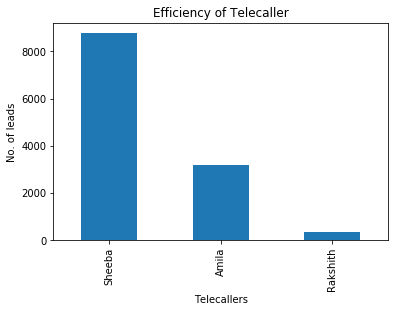

In [79]:
data_original["name_y"].value_counts().plot(kind='bar')
plt.xlabel("Telecallers")
plt.ylabel("No. of leads")
plt.title("Efficiency of Telecaller")

### Lets see top 15 city and state from where major leads are coming such that we can more focus on those city and states:

Text(0.5, 1.0, 'State based leads')

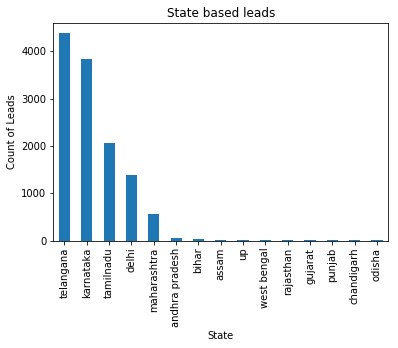

In [80]:
data_original["state"].value_counts().head(15).plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Count of Leads")
plt.title("State based leads")

Text(0.5, 1.0, 'City based leads')

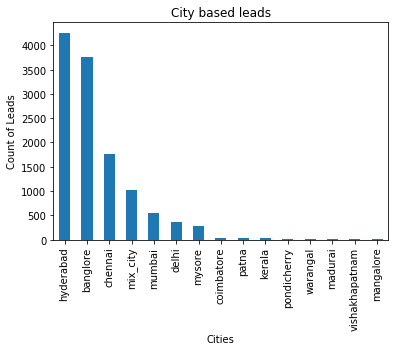

In [81]:
data_original["city"].value_counts().head(15).plot(kind='bar')
plt.xlabel("Cities")
plt.ylabel("Count of Leads")
plt.title("City based leads")

In [82]:
## So based on above graphs we can see that Telangana state and Hyderabad city has major leads:

### Lets see which client has major reuirement such that we can more focusly work for him to find more resource if in case one resource rejects the offer 

Text(0.5, 1.0, 'Client Requirement')

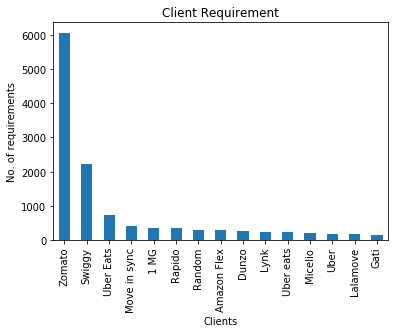

In [83]:
data_original["client"].value_counts().head(15).plot(kind='bar')
plt.xlabel("Clients")
plt.ylabel("No. of requirements")
plt.title("Client Requirement")

In [84]:
### So we can see zomato has high requirement which is going back and forth for resource:

Text(0.5, 1.0, 'State per city based leads')

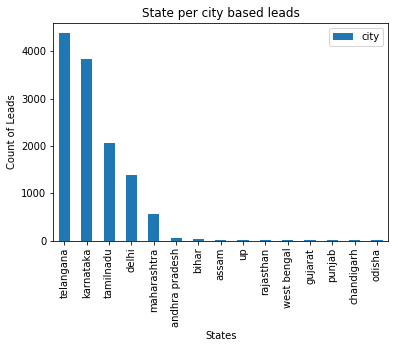

In [85]:
data_original.groupby("state").agg({"city" :pd.Series.mode, "city": np.size}).sort_values(by="city",ascending=False).head(15).plot(kind='bar')
plt.xlabel("States")
plt.ylabel("Count of Leads")
plt.title("State per city based leads")

### Now lets see how many leads are external or internal

Text(0.5, 1.0, 'Leads')

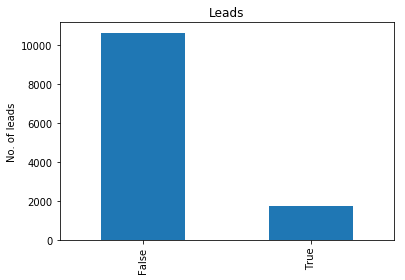

In [86]:
data_original["isExternal"].value_counts().head(15).plot(kind='bar')
plt.ylabel("No. of leads")
plt.title("Leads")

In [87]:
# So from above graph we can see that leads are majorly taken from internal platform, here we can work for 
# more leads to acuire through third party which can give us business.

### Now let's see based on city or state how many leads are external or internals: such that we can more focus on particular state or city according to leads

##### State Wise:

In [88]:
external_internal_diff = pd.DataFrame(data_original.groupby("state")["isExternal"].value_counts())

In [89]:
external_internal = external_internal_diff.rename(columns={"isExternal": "count"}).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

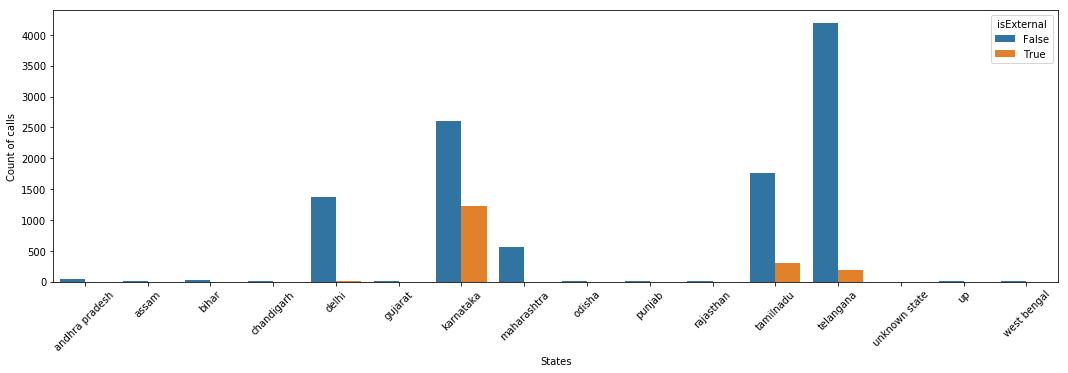

In [90]:
plt.figure(figsize=(18,5))
sns.barplot(x=external_internal["state"], y=external_internal["count"], hue=external_internal["isExternal"])
plt.xlabel("States")
plt.ylabel("Count of calls")
plt.xticks(rotation=45)

#### Here in above graph we can see that karnataka, tamilnadu and telangana is getting more external leads

### Citiwise check:

In [91]:
leads = lead[['city', 'isExternal', 'source']].groupby(['city','isExternal']).count()
leads = leads.reset_index()
leads = leads.pivot(index='city', columns='isExternal', values='source')
del leads.columns.name
leads = leads.reset_index()
leads.columns=['city', 'LeadsByJobAssist', 'LeadsByExternal']

In [92]:
leads_city = leads.sort_values(by='LeadsByJobAssist', ascending=False)
leads_city.reset_index(inplace=True)
leads_city.head(10)

,index,city,LeadsByJobAssist,LeadsByExternal
0,20,Hyderabad,3374.0,39.0
1,4,Bangalore,1678.0,593.0
2,11,Chennai,1219.0,63.0
3,16,Delhi/NCR,891.0,3.0
4,37,Mumbai,536.0,NaN
5,15,Delhi,352.0,1.0
6,42,Patna,21.0,NaN
7,13,Coimbatore,16.0,4.0
8,57,Warangal,10.0,2.0
9,26,Karimnagar,9.0,NaN


In [93]:
#  City wise improvement required in:

leads_city_improve = leads_city.sort_values(by='LeadsByExternal', ascending=False)
leads_city_improve.reset_index(inplace=True)
leads_city_improve.drop("level_0",axis=1, inplace=True)
leads_city_improve.head(10)

,index,city,LeadsByJobAssist,LeadsByExternal
0,4,Bangalore,1678.0,593.0
1,38,Mysore,4.0,169.0
2,11,Chennai,1219.0,63.0
3,20,Hyderabad,3374.0,39.0
4,43,Pondicherry,NaN,21.0
5,27,Kerala,NaN,20.0
6,7,Belagavi,NaN,12.0
7,58,Yadhgirir,NaN,10.0
8,33,Madurai,5.0,6.0
9,0,Ahmedabad,1.0,6.0


##### City Wise

In [94]:
external_internal_diff1 = pd.DataFrame(data_original.groupby("city")["isExternal"].value_counts())

In [95]:
external_internal_city = external_internal_diff1.rename(columns={"isExternal": "count"}).reset_index()
Top_10 = external_internal_city[["city","isExternal","count"]].sort_values(ascending=False,by="count").head(10)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

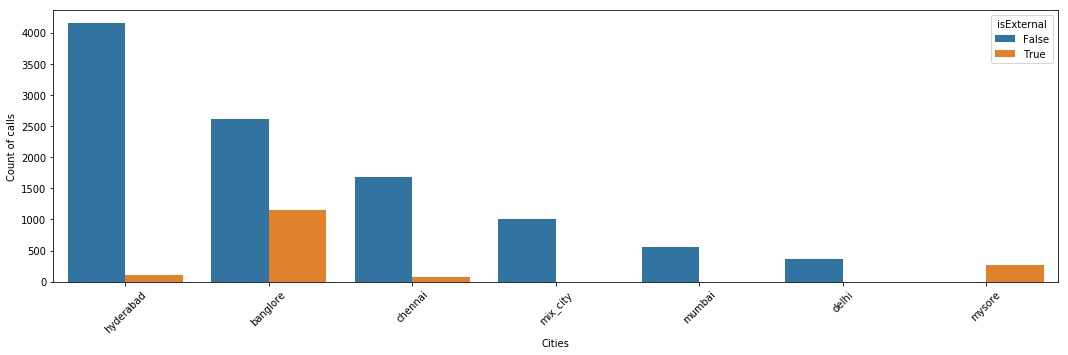

In [96]:
plt.figure(figsize=(18,5))
sns.barplot(x=Top_10["city"], y=Top_10["count"], hue=Top_10["isExternal"])
plt.xlabel("Cities")
plt.ylabel("Count of calls")
plt.xticks(rotation=45)

#### Here we can see that banlore,mysore,chennai and hyderabad are getting more outside leads

##### Let's make some intutions through our status column which can tell us which candiadte is going to join and not.

In [97]:
# Lets try to change the values of column as to have clear view:

data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Applied','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('CNP/Switched Off/Not Reachable','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Not Applied','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Disconnected the Call','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Switched Off/Not Reachable','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Wrong Number/Number Not Valid','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Sure','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Disconnected the Call','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace("Don't Meet Requirements",'Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Want Non-Delivery Jobs','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Other Reasons','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Got Other Jobs','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Other Reasons','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Got Other Jobs','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Number Not Valid/Number Does Not Exist','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Wrong Number','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Switched Off/Not Reachable/No Incoming','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Location Issue','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Applied by Mistake','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Others','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Location Issue','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Not Sure','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Language Barrier','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Got Other Jobs','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Want Jobs in Other Category','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested but Referred Someone','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not sure','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Want Other Delivery Jobs','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Interested and Referred Someone','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Applied by Mistake','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Applied for Someone Else','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Call Back','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Want Other Delivery Jobs','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Want Jobs in Other Company (but same category)','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Disconnected the call','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Want Non-Delivery Jobs','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Interested but CNP on Follow-up','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not interested','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Call Back','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Applied by mistake','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('CNP/Switched off/Not Reachable','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Location issue','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Interested but RNR on Follow-up','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Switched Off/Not Reachable/No Incoming Up','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('RNR','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested - Not Interested','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested/No Incoming','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested/No Incoming Up','Not Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Not Interested Up','Not Interested'))

In [98]:
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Very Interested','Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Interested','Interested'))
data_original["status"] = data_original["status"].apply(lambda x : x.replace('Interested but in village','Interested'))

In [99]:
# Now we have only three categories based on which we can get some inference:

In [100]:
status_count = pd.DataFrame(data_original["status"].value_counts().reset_index())
status_count = status_count.rename(columns={"index":"status", "status":"count"})

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

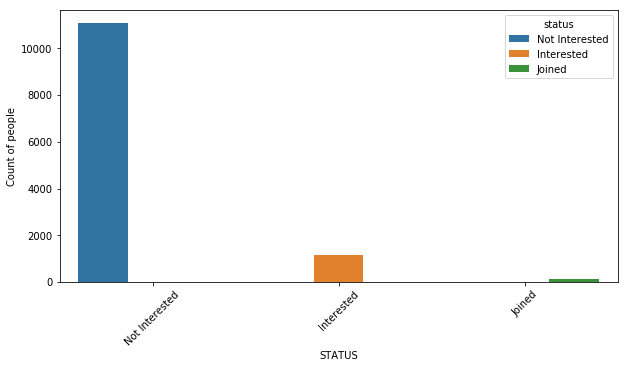

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(x=status_count["status"], y=status_count["count"], hue=status_count["status"])
plt.xlabel("STATUS")
plt.ylabel("Count of people")
plt.xticks(rotation=45)

##### Here in above graph we can see that most of the people are not interested, the area where we have to work is on interested people to let them consider the things and the people already joined is our success.

#### Based on city we can see how many are interested or not.

In [102]:
city_based_status = pd.DataFrame(data_original.groupby("city")["status"].value_counts())
city_based_status = city_based_status.rename(columns={"status":"count"})
city_based_status = city_based_status.reset_index()

####  Lets take the frame of people who are not interested and to find out top10 city where people are not interested.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

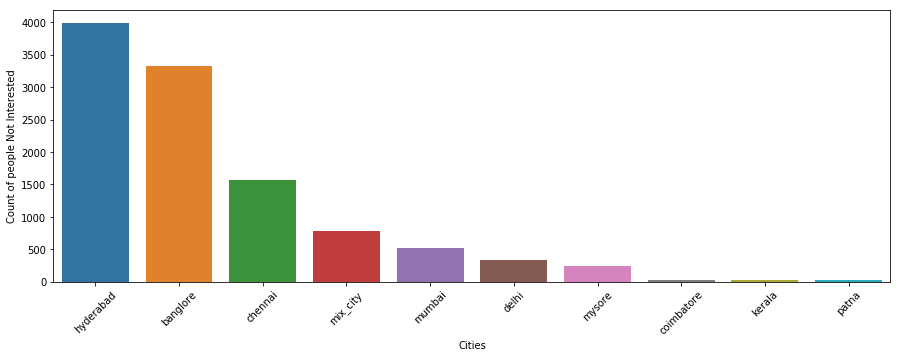

In [103]:
top_10_city_NI = city_based_status[city_based_status["status"]=="Not Interested"].sort_values(ascending=False, by="count").head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_10_city_NI["city"],y=top_10_city_NI["count"])
plt.xlabel("Cities")
plt.ylabel("Count of people Not Interested")
plt.xticks(rotation=45)

####  Lets take the frame of people who are not interested and to find out top10 state where people are not interested.

In [104]:
state_based_status = pd.DataFrame(data_original.groupby("state")["status"].value_counts())
state_based_status = state_based_status.rename(columns={"status":"count"})
state_based_status = state_based_status.reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

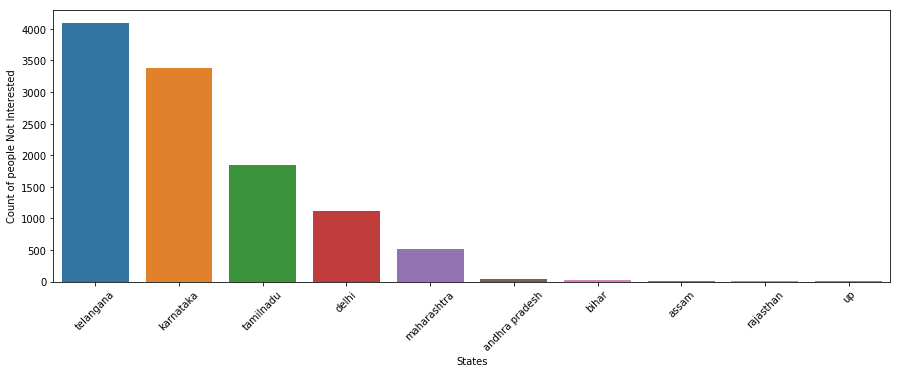

In [105]:
top_10_state_NI = state_based_status[state_based_status["status"]=="Not Interested"].sort_values(ascending=False, by="count").head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_10_state_NI["state"],y=top_10_state_NI["count"])
plt.xlabel("States")
plt.ylabel("Count of people Not Interested")
plt.xticks(rotation=45)

In [106]:
# Let's drop some more unused columns:

In [107]:
data_original.drop(["userId","name_x","leadId","source"], axis=1, inplace=True)

In [108]:
data_original.drop(["calledAt"], axis=1, inplace=True) #As after extracting the date came to know that all entries filled at same date

In [109]:
data_original["UserId"] = data["userId"]

In [110]:
data_original.head(2)

,city,state,isExternal,receivedAt,client,status,name_y,createdAt,UserId
0,banglore,karnataka,True,2019-11-01T05:41:00Z,Move in sync,Not Interested,Sheeba,2019-12-25T05:50:26.385Z,NaN
1,hyderabad,telangana,False,2019-07-25T00:00:00Z,Dunzo,Not Interested,Sheeba,2019-12-25T05:50:26.385Z,e50fccfe-82aa-434a-ad92-9d3f9d651f84


### Let's have some insights based on date that on which date more leads came such we can utilize more resources as per leads data and that can help us to forecast future requirements:

In [111]:
data_original['Date'] = pd.to_datetime(data_original['receivedAt']).dt.date

##### This is to show month wise efficiency

In [112]:
top_20_days = pd.DataFrame(data_original.groupby('Date')['UserId'].count().sort_values(ascending=False).head(20))
top_20_days = top_20_days.reset_index()
top_20_days = top_20_days.rename(columns = {"UserId": "Count"})

(array([737150., 737180., 737211., 737241., 737272., 737303., 737333.,
        737364.]), <a list of 8 Text xticklabel objects>)

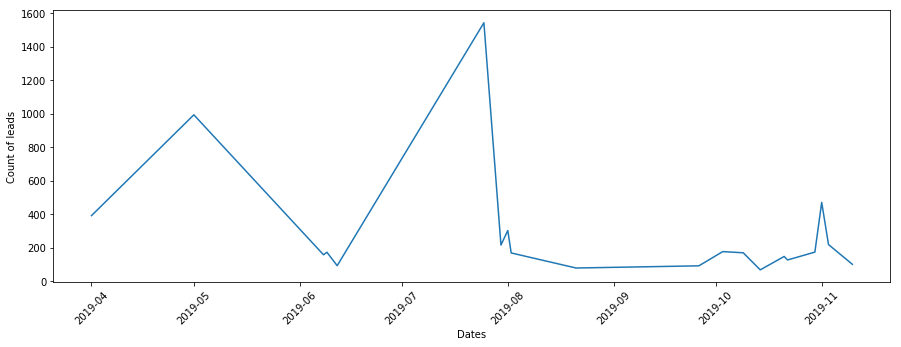

In [113]:
plt.figure(figsize=(15,5))
sns.lineplot(x=top_20_days["Date"],y=top_20_days["Count"], data=top_20_days, dashes=False,sort=True)
plt.xlabel("Dates")
plt.ylabel("Count of leads")
plt.xticks(rotation=45)

##### Here in above graph we can clearly see that in month between April-May and Jul-Aug the leads are which, so we can expect more calls in these moths and can decide the workload and can also ready for future.

## Now as per details we can try to forecast the leads and can predict the upcoming count of leads in future:

In [114]:
data_original.head(2)

,city,state,isExternal,receivedAt,client,status,name_y,createdAt,UserId,Date
0,banglore,karnataka,True,2019-11-01T05:41:00Z,Move in sync,Not Interested,Sheeba,2019-12-25T05:50:26.385Z,NaN,2019-11-01
1,hyderabad,telangana,False,2019-07-25T00:00:00Z,Dunzo,Not Interested,Sheeba,2019-12-25T05:50:26.385Z,e50fccfe-82aa-434a-ad92-9d3f9d651f84,2019-07-25


In [115]:
time_data = pd.DataFrame(data_original.groupby('Date')['UserId'].count().reset_index().rename(columns={"UserId":"Lead_count"}))

In [116]:
import datetime

In [117]:
time_data['month_year'] = pd.to_datetime(time_data['Date']).dt.to_period('M')

In [118]:
time_data['month'] = pd.to_datetime(time_data['Date']).dt.month

In [119]:
time_data.head()

,Date,Lead_count,month_year,month
0,2019-02-12,0,2019-02,2
1,2019-02-23,2,2019-02,2
2,2019-02-24,3,2019-02,2
3,2019-03-01,1,2019-03,3
4,2019-03-07,1,2019-03,3


In [120]:
moth_wise_count = pd.DataFrame(time_data.groupby(["month"])["Lead_count"].sum().sort_values(ascending=True)).reset_index()
moth_wise_count

,month,Lead_count
0,2,5
1,3,57
2,9,134
3,4,569
4,8,772
5,6,932
6,11,1068
7,5,1110
8,10,1158
9,7,1975


Text(0, 0.5, 'Count of leads')

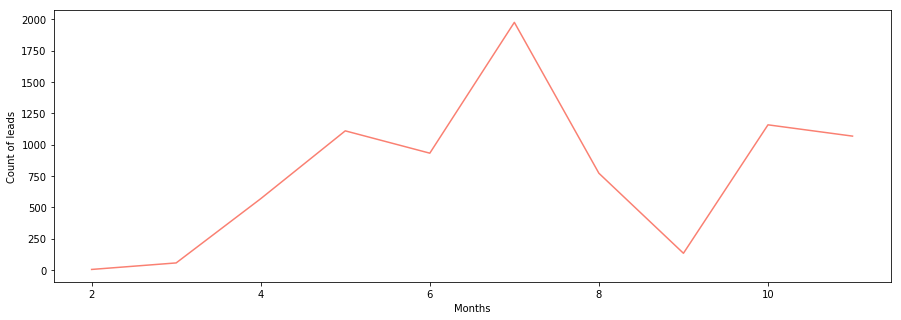

In [121]:
plt.figure(figsize=(15,5))
sns.lineplot(x=moth_wise_count["month"], y=moth_wise_count["Lead_count"], data=moth_wise_count, color="salmon")
plt.xlabel("Months")
plt.ylabel("Count of leads")

##### The above graph shows month wise total leads and we cannot proceed with forecast here as data is in sufficient.

In [122]:
data_original.head(2)

,city,state,isExternal,receivedAt,client,status,name_y,createdAt,UserId,Date
0,banglore,karnataka,True,2019-11-01T05:41:00Z,Move in sync,Not Interested,Sheeba,2019-12-25T05:50:26.385Z,NaN,2019-11-01
1,hyderabad,telangana,False,2019-07-25T00:00:00Z,Dunzo,Not Interested,Sheeba,2019-12-25T05:50:26.385Z,e50fccfe-82aa-434a-ad92-9d3f9d651f84,2019-07-25


## Lets try to have a model prediction.

In [123]:
# let drop the columns whcih are not required for prediction.

In [124]:
data_original.drop(["receivedAt","createdAt","UserId"],axis=1,inplace=True)

In [125]:
data_original.Date.isnull().sum()

0

In [126]:
data_original.head()

,city,state,isExternal,client,status,name_y,Date
0,banglore,karnataka,True,Move in sync,Not Interested,Sheeba,2019-11-01
1,hyderabad,telangana,False,Dunzo,Not Interested,Sheeba,2019-07-25
2,hyderabad,telangana,False,Zomato,Not Interested,Sheeba,2019-06-03
3,banglore,karnataka,False,Zomato,Not Interested,Sheeba,2019-04-01
4,hyderabad,telangana,False,Swiggy,Not Interested,Sheeba,2019-07-25


In [127]:
data_original["status"].unique()  # So we will filter only data where user is interested and not interested as they are for 
                                  # main focus where we can predict based on data that whether user is going to join or not.

array(['Not Interested', 'Interested', 'Joined'], dtype=object)

In [128]:
data_original.city.nunique()

58

In [129]:
data_original.state.nunique()

16

In [130]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12335 entries, 0 to 12334
Data columns (total 7 columns):
city          12335 non-null object
state         12335 non-null object
isExternal    12335 non-null bool
client        12335 non-null object
status        12335 non-null object
name_y        12335 non-null object
Date          12335 non-null object
dtypes: bool(1), object(6)
memory usage: 686.6+ KB


In [131]:
data_original.describe()

,city,state,isExternal,client,status,name_y,Date
count,12335,12335,12335,12335,12335,12335,12335
unique,58,16,2,22,3,3,163
top,hyderabad,telangana,False,Zomato,Not Interested,Sheeba,2019-07-25
freq,4261,4377,10631,6080,11072,8770,2454


In [132]:
#data_original.drop("Date",axis=1,inplace=True)
data_original.head()

,city,state,isExternal,client,status,name_y,Date
0,banglore,karnataka,True,Move in sync,Not Interested,Sheeba,2019-11-01
1,hyderabad,telangana,False,Dunzo,Not Interested,Sheeba,2019-07-25
2,hyderabad,telangana,False,Zomato,Not Interested,Sheeba,2019-06-03
3,banglore,karnataka,False,Zomato,Not Interested,Sheeba,2019-04-01
4,hyderabad,telangana,False,Swiggy,Not Interested,Sheeba,2019-07-25


In [133]:
data_original_parsed = pd.get_dummies(data_original,drop_first=True)

In [134]:
data_original_parsed.shape

(12335, 260)

In [135]:
data_original_parsed.head(10)

,isExternal,city_aligarh,city_anantapur,city_asansol,city_banglore,city_belagavi,city_bheedhar,city_bhimavaram,city_chandigarh,city_chennai,...,Date_2019-11-19,Date_2019-11-20,Date_2019-11-21,Date_2019-11-22,Date_2019-11-23,Date_2019-11-24,Date_2019-11-25,Date_2019-11-27,Date_2019-11-28,Date_2019-11-29
0,True,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,True,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,False,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
data_original_parsed["isExternal"] = data_original_parsed[["isExternal"]].astype(str)

In [137]:
ls=[]
for i in data_original_parsed["isExternal"]:
    if(i=="True"):
        ls.append(1)
    else:
        ls.append(0)

In [138]:
data_original_parsed.drop(["isExternal","status_Joined"], axis=1, inplace=True)

In [139]:
data_original_parsed["isExternal"] = ls

In [140]:
data_original_parsed.head()

,city_aligarh,city_anantapur,city_asansol,city_banglore,city_belagavi,city_bheedhar,city_bhimavaram,city_chandigarh,city_chennai,city_coimbatore,...,Date_2019-11-20,Date_2019-11-21,Date_2019-11-22,Date_2019-11-23,Date_2019-11-24,Date_2019-11-25,Date_2019-11-27,Date_2019-11-28,Date_2019-11-29,isExternal
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
data_original_parsed.describe()

,city_aligarh,city_anantapur,city_asansol,city_banglore,city_belagavi,city_bheedhar,city_bhimavaram,city_chandigarh,city_chennai,city_coimbatore,...,Date_2019-11-20,Date_2019-11-21,Date_2019-11-22,Date_2019-11-23,Date_2019-11-24,Date_2019-11-25,Date_2019-11-27,Date_2019-11-28,Date_2019-11-29,isExternal
count,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,...,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000,12335.000000
mean,0.000567,0.000405,0.000081,0.305067,0.000973,0.000081,0.000081,0.000324,0.142846,0.002837,...,0.001297,0.001459,0.001621,0.001378,0.000649,0.000081,0.000081,0.000892,0.000162,0.138143
std,0.023816,0.020130,0.009004,0.460454,0.031176,0.009004,0.009004,0.018006,0.349929,0.053194,...,0.035994,0.038174,0.040236,0.037100,0.025460,0.009004,0.009004,0.029850,0.012733,0.345065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
data_correlation = data_original_parsed.corr()

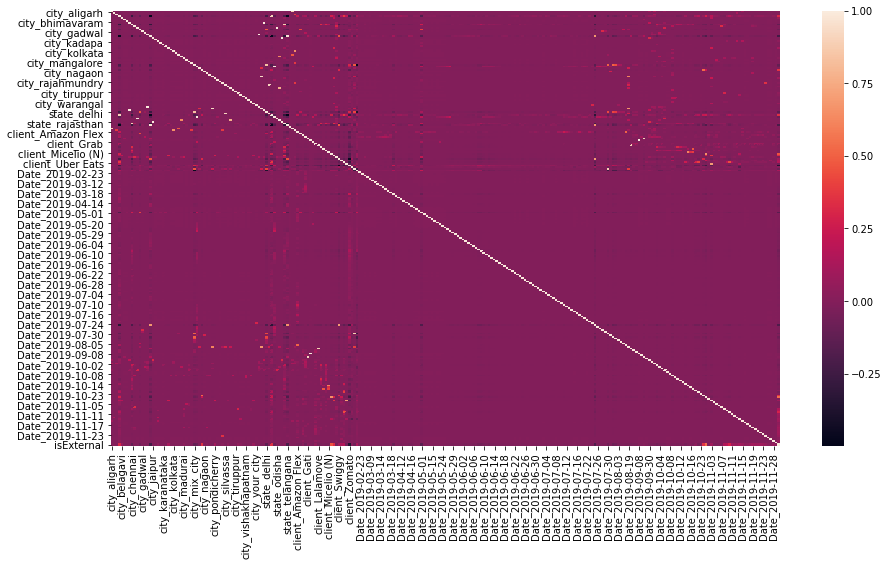

In [143]:
plt.figure(figsize=(15,8))
sns.heatmap(data_correlation)  # To check correlation between columns

In [144]:
X = data_original_parsed.drop("status_Not Interested", axis=1)

In [145]:
Y = data_original_parsed["status_Not Interested"]

### Let's try to fit Logistic Regression model as it is a classification problem where we are checking based on data when new lead comes he will be interested or not interested


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [147]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=.20, random_state=40)

In [148]:
xtrain.shape

(9868, 258)

In [149]:
ytrain.shape

(9868,)

In [150]:
xtest.shape

(2467, 258)

In [151]:
ytest.shape

(2467,)

In [152]:
logreg = LogisticRegression()  #Initializing the model
logreg.fit(xtrain,ytrain)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
ypred = logreg.predict(xtest)

In [154]:
accuracy_score(ytest,ypred)

0.8925820835022295

### Let's try to check with Naive Bayes model

In [155]:
from sklearn.naive_bayes import BernoulliNB  # As the target variable is in having Boolean category[0,1]

In [156]:
bnb = BernoulliNB() # alpha=1 as smooting is considered and also fit_prior is used as default
bnb.fit(xtrain,ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [157]:
ypred = bnb.predict(xtest)

In [158]:
accuracy_score(ytest,ypred)

0.8362383461694366

### Let's try to check with Decision Tree:

In [159]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion = "entropy",random_state = 100)
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)
print('Accuracy Score :',accuracy_score(ytest,ypred))
print('Confusion Matrix :',confusion_matrix(ytest,ypred))

Accuracy Score : 0.8362383461694366
Confusion Matrix : [[  65  209]
 [ 195 1998]]


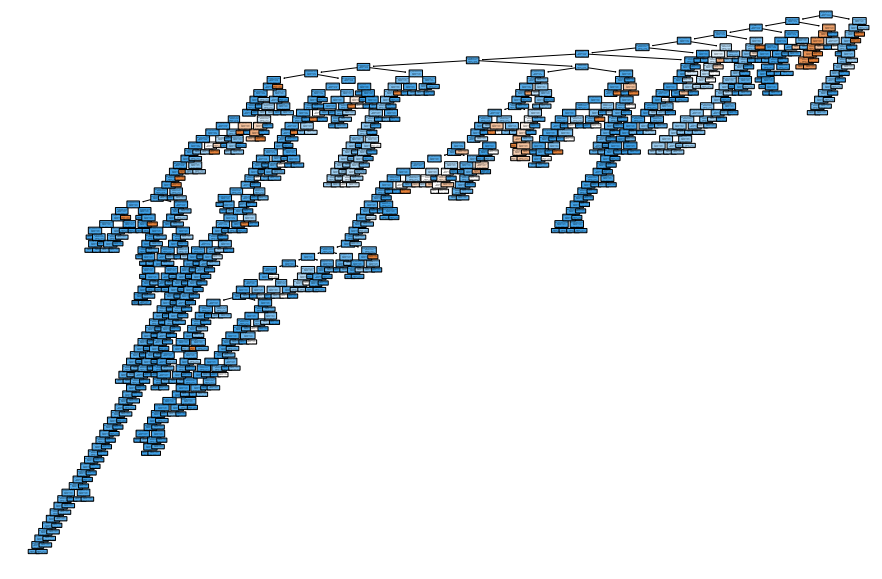

In [160]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
cols=list(X.columns.values)
tree.plot_tree(clf.fit(X,Y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

### Let's try with Random Forest:

In [161]:
# Importing Libraries:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(xtrain,ytrain)
y_pred=rf.predict(xtest)
print('Accuracy Score :',accuracy_score(ytest,ypred))
print('Confusion Matrix :',confusion_matrix(ytest,ypred))

Accuracy Score : 0.8362383461694366
Confusion Matrix : [[  65  209]
 [ 195 1998]]


### Let's try with Adaboost:

In [162]:
ab=AdaBoostClassifier(n_estimators=100)
ab.fit(xtrain,ytrain)
y_pred=ab.predict(xtest)
print('Accuracy Score :',accuracy_score(ytest,ypred))
print('Confusion Matrix :',confusion_matrix(ytest,ypred))

Accuracy Score : 0.8362383461694366
Confusion Matrix : [[  65  209]
 [ 195 1998]]


### Let's try with Gradient Boost:

In [163]:
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
y_pred=gb.predict(xtest)
print('Accuracy Score :',accuracy_score(ytest,ypred))
print('Confusion Matrix :',confusion_matrix(ytest,ypred))

Accuracy Score : 0.8362383461694366
Confusion Matrix : [[  65  209]
 [ 195 1998]]


### Lets try with XGBOOST:

In [164]:
#Importing Library:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
y_pred=xgb.predict(xtest)
print('Accuracy Score :',accuracy_score(ytest,ypred))
print('Confusion Matrix :',confusion_matrix(ytest,ypred))

Accuracy Score : 0.8362383461694366
Confusion Matrix : [[  65  209]
 [ 195 1998]]


# As from all above models we can see that Logistic has given the best accuracy of around 89%, so we will go with logistic regression 

##### 1_ We have not done any feature scaling as data is in [0,1] format which we transformed using get_dummies function.
2_ We have not done any outlier treatment as most data is in categorical form.                                              
3_ We have not done any feature extraction as it is not idenfiable which feature to take which not, we can do backward and        forward selection or PCA or wrapper techinique but due time constraint, we are bound.

Here in this project we have dropped some columns because:

leads id is uniquely identified in  each row, So we can drop this feature
userId is used to refer internal database entry, This can also be dropped.
Name is not important.
Since phone number is all same in this data, or all different in the original data, This can be dropped.


### Process Efficiency